In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://raw.githubusercontent.com/marioraulgz/SpotifyBEDU-LaRevancha/main/Postworks/Datasets/data_delimited.csv'
df = pd.read_csv(url,index_col=0)

In [ ]:
df.head(5)

,added_at,is_local,added_by.type,track.album.album_type,track.album.id,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,track.album.type,track.disc_number,track.duration_ms,track.episode,track.explicit,track.external_ids.isrc,track.is_local,track.name,track.popularity,track.track,track.track_number,track.type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,2020-12-01T05:02:00Z,False,user,album,4yP0hdKOZPNshxUOjY0cZj,After Hours,2020-03-20,day,14,album,1,200040,False,False,USUG11904206,False,Blinding Lights,96,True,9,track,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,4
1,2020-12-01T05:02:00Z,False,user,single,31IDBea3eEs57a0joX6TjN,Dance Monkey,2019-05-10,day,1,album,1,209754,False,False,QZES71982312,False,Dance Monkey,68,True,1,track,0.825,0.593,6,-6.401,0,0.0988,0.68800,0.000161,0.1700,0.540,98.078,1rgnBhdG2JDFTbYkYRZAku,4
2,2020-12-01T05:02:00Z,False,user,album,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,day,16,album,1,196652,False,True,USAT21906978,False,The Box,87,True,2,track,0.896,0.586,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,0nbXyq5TXYPCO7pr3N8S4I,4
3,2020-12-01T05:02:00Z,False,user,single,6XcYTEonLIpg9NpAbJnqrC,Roses (Imanbek Remix),2019-09-13,day,1,album,1,176218,False,True,RUB421901499,False,Roses - Imanbek Remix,66,True,1,track,0.785,0.721,8,-5.457,1,0.0506,0.01490,0.004320,0.2850,0.894,121.962,2Wo6QQD1KMDWeFkkjLqwx5,4
4,2020-12-01T05:02:00Z,False,user,album,7fJJK56U9fHixgO0HQkhtI,Future Nostalgia,2020-03-27,day,11,album,1,183290,False,False,GBAHT1901121,False,Don't Start Now,83,True,2,track,0.793,0.793,11,-4.521,0,0.0830,0.01230,0.000000,0.0951,0.679,123.950,3PfIrDoz19wz7qK7tYeu62,4


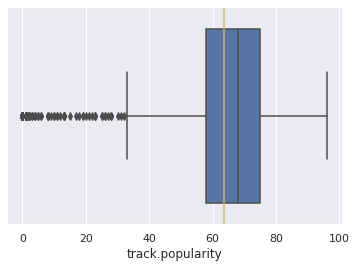

In [ ]:
sns.set(style="darkgrid")
sns.boxplot(x=df['track.popularity'])
plt.axvline(df['track.popularity'].mean(), c='y')

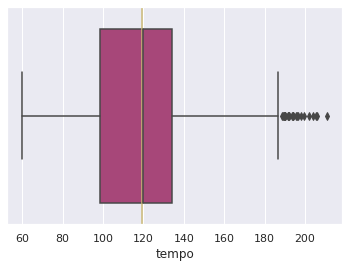

In [ ]:
sns.set(style="darkgrid")
sns.boxplot(x=df['tempo'],palette='magma')
plt.axvline(df['tempo'].mean(), c='y')

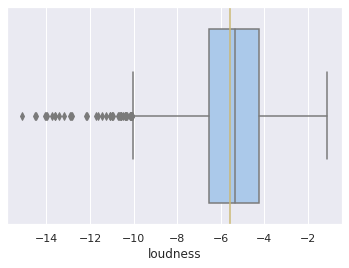

In [ ]:
sns.set(style="darkgrid")
sns.boxplot(x=df['loudness'],palette='pastel')
plt.axvline(df['loudness'].mean(), c='y')

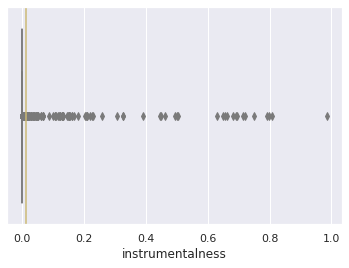

In [ ]:
sns.set(style="darkgrid")
sns.boxplot(x=df['instrumentalness'],palette='pastel')
plt.axvline(df['instrumentalness'].mean(), c='y')

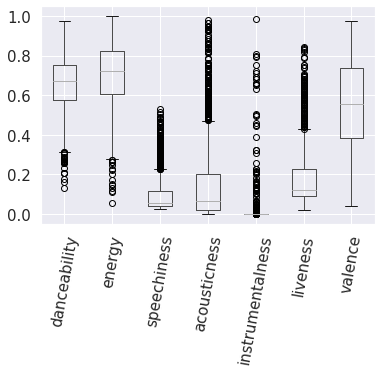

In [ ]:
boxplot = df.boxplot(column=['danceability', 'energy','speechiness','acousticness','instrumentalness','liveness','valence'],rot=80, fontsize=15)

In [ ]:
iqr = df['track.popularity'].quantile(0.75) - df['track.popularity'].quantile(0.25)
filtro_inferior = df['track.popularity'] > df['track.popularity'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['track.popularity'] < df['track.popularity'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

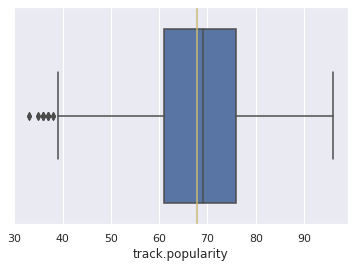

In [ ]:
sns.set(style="darkgrid")
sns.boxplot(x=df_filtrado['track.popularity'])
plt.axvline(df_filtrado['track.popularity'].mean(), c='y')

In [ ]:
print('Promedio:', df['track.popularity'].mean())
print('Promedio filtrado:', df_filtrado['track.popularity'].mean())
print('Mediana:', df['track.popularity'].median())
print('Mediana filtrada:', df_filtrado['track.popularity'].median())
print('Desviación estándar:', df['track.popularity'].std())
print('Desviación estándar filtrada:', df_filtrado['track.popularity'].std())

Promedio: 63.44243902439025
Promedio filtrado: 67.78238070267436
Mediana: 68.0
Mediana filtrada: 69.0
Desviación estándar: 19.030833523515057
Desviación estándar filtrada: 10.652743711317727


In [ ]:
popular = df_filtrado['track.popularity']
pd.cut(popular, 20)
segmentos = pd.cut(popular, 20)
df_filtrado['track.popularity'].groupby(segmentos).count()

track.popularity
(32.937, 36.15]     10
(36.15, 39.3]       11
(39.3, 42.45]       17
(42.45, 45.6]       17
(45.6, 48.75]       41
(48.75, 51.9]       52
(51.9, 55.05]       94
(55.05, 58.2]      131
(58.2, 61.35]      138
(61.35, 64.5]      169
(64.5, 67.65]      185
(67.65, 70.8]      196
(70.8, 73.95]      202
(73.95, 77.1]      282
(77.1, 80.25]      161
(80.25, 83.4]      122
(83.4, 86.55]       50
(86.55, 89.7]       22
(89.7, 92.85]        5
(92.85, 96.0]        2
Name: track.popularity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


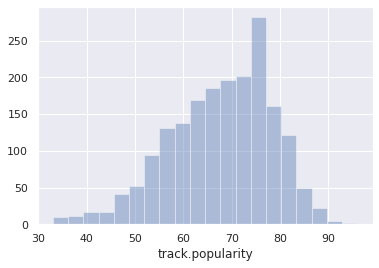

In [ ]:
sns.distplot(df_filtrado['track.popularity'], kde=False, norm_hist=False, bins=20)

In [ ]:
variables_num = df_filtrado[["track.popularity", "loudness",'danceability', 'energy','speechiness','acousticness','liveness','valence','tempo','track.duration_ms']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd10f0de4d0>,
      dtype=object)

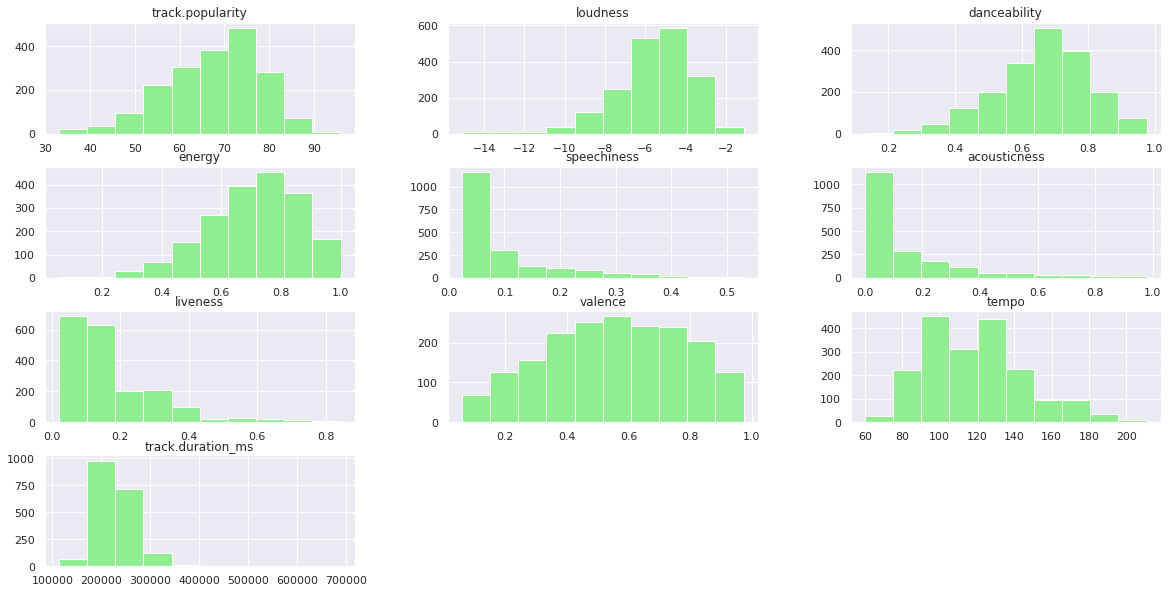

In [ ]:
variables_num.hist(figsize=(20,10), color = 'lightgreen')

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
print(f'Curtosis: {kurtosis(variables_num)}')
print(f'Asimetría: {skew(variables_num)}')

Curtosis: [-3.86122859e-02  2.04761335e+00  1.28204234e-01  1.75936429e-01
  3.53698657e+00  4.10559380e+00  9.00169150e+01  4.30225107e+00
 -8.74734589e-01 -5.96124998e-03  1.21854819e+01]
Asimetría: [-0.49057698 -0.98768    -0.44062646 -0.61764201  1.94117976  2.01666601
  9.14273126  1.91096164 -0.13211916  0.56637975  1.81677416]


In [ ]:
variables_num.agg(
        {
          "track.popularity": ["kurtosis", "skew"],
          "loudness": ["kurtosis", "skew"],
          "danceability": ["kurtosis", "skew"],
          "energy": ["kurtosis", "skew"],
          "speechiness": ["kurtosis", "skew"],
          "instrumentalness": ["kurtosis", "skew"],
          "liveness": ["kurtosis", "skew"],
          "valence": ["kurtosis", "skew"],
          "tempo": ["kurtosis", "skew"],
          "track.duration_ms": ["kurtosis", "skew"],
         }
           )

,track.popularity,loudness,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,track.duration_ms
kurtosis,-0.035561,2.056145,0.131694,0.179552,3.549431,90.256531,4.316705,-0.873879,-0.002824,12.220645
skew,-0.490963,-0.988458,-0.440973,-0.618128,1.942708,9.149930,1.912466,-0.132223,0.566826,1.818205


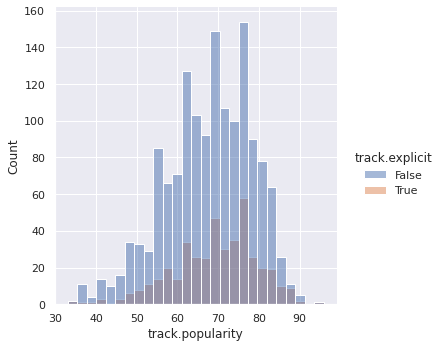

In [ ]:
sns.displot(df_filtrado, x="track.popularity", hue="track.explicit", kde_kws = {'shade': True})

In [ ]:
popexp = df_filtrado[df_filtrado['track.explicit'] == 1]
popnexp= df_filtrado[df_filtrado['track.explicit'] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


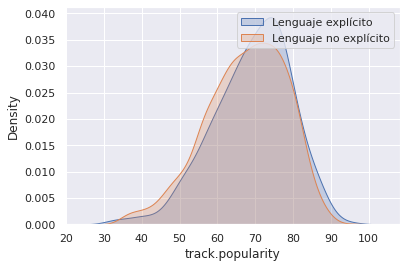

In [ ]:
sns.distplot(popexp['track.popularity'], hist = False, label= 'Lenguaje explícito', kde_kws = {'shade': True})
sns.distplot(popnexp['track.popularity'], hist = False, label= 'Lenguaje no explícito', kde_kws = {'shade': True})
plt.legend()